In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
IMG_SIZE = 28

In [3]:
def load_data():
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test)  = mnist.load_data()
    
    x_train = np.divide(x_train, 255.0)
    x_train = x_train.reshape((60000, 28, 28, 1))
    x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2), (0, 0)), mode="constant")
    
    x_test = np.divide(x_test, 255.0)
    x_test = x_test.reshape((10000, 28, 28, 1))
    x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2), (0, 0)), mode="constant")
    
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    
    return (x_train, y_train, x_test, y_test)

In [4]:
train_data, train_label, test_data, test_label = load_data()
print("Train dataset sizes: " + str(train_data.shape))
print("Test dataset sizes: " + str(test_data.shape))

Train dataset sizes: (60000, 32, 32, 1)
Test dataset sizes: (10000, 32, 32, 1)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation="tanh", input_shape=train_data[0].shape))
model.add(layers.AveragePooling2D(strides=1, padding="same"))
model.add(layers.Conv2D(16, (5, 5), activation="tanh"))
model.add(layers.AveragePooling2D(strides=2, padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation="tanh"))
model.add(layers.Dense(84, activation="tanh"))
model.add(layers.Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 28, 28, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               276600    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
model.fit(train_data, train_label, batch_size=128, epochs=2)

Epoch 1/2
469/469 [==============================] - 22s 48ms/step - loss: 0.2502 - accuracy: 0.9276
Epoch 2/2
469/469 [==============================] - 23s 50ms/step - loss: 0.1007 - accuracy: 0.9706


In [9]:
prediction = model.predict(test_data)

In [9]:
test_loss, test_acc = model.evaluate(test_data, test_label)

313/313 [==============================] - 2s 6ms/step - loss: 0.0841 - accuracy: 0.9745


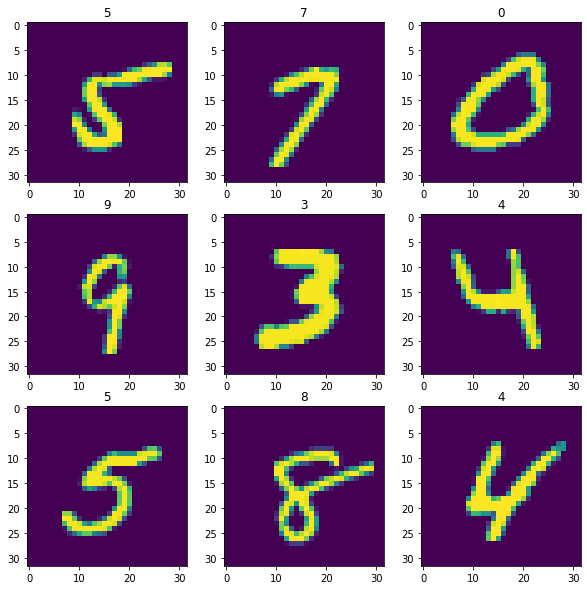

In [10]:
import random

fig = plt.figure(figsize=(10, 10))
# sub = fig.add_subplot(3, 3, 1)
for i in range(9):
    num_img = random.randrange(0, test_data.shape[0])
    fig.add_subplot(3, 3, i + 1)
    plt.imshow(test_data[num_img])
    plt.title(str(np.argmax(model.predict(test_data[num_img].reshape((1, 32, 32, 1))))))
plt.show()